## 1. Importing Data

In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The datasets were successfully imported using the readr package. The `players` data contains 196 rows and 7 columns, and the `sessions` data contains 1535 rows and 5 columns.


## 2. Data Description and Definition

For this project, I’m working with two related datasets called `players.csv` and `sessions.csv`.  
They come from a Minecraft research server managed by a UBC research group that studies how people play games.  
Together, they describe how **196 unique players** interacted with the game and when they played, across a total of **1,535 recorded play sessions**.

The **players** file contains demographic and behavioral information about each player, such as their age, experience level, and total playtime.  
The **sessions** file records detailed logs of individual play sessions, including when each one started and ended.  
Below is a summary of what each column represents.

### `players.csv`

| Variable | Type | Description |
|-----------|------|-------------|
| experience | Character | The player’s self-reported experience level (e.g., Pro, Veteran, Amateur). |
| subscribe | Logical | TRUE if the player subscribed to the game newsletter, FALSE otherwise. |
| hashedEmail | Character | A unique anonymous ID used to link the player and session data. |
| played_hours | Numeric | Total hours the player spent on the server. |
| name | Character | The player’s in-game name. |
| gender | Character | Player’s gender (Male or Female). |
| Age | Numeric | The player’s age in years. |

### `sessions.csv`

| Variable | Type | Description |
|-----------|------|-------------|
| hashedEmail | Character | Identifier used to connect each session to a player. |
| start_time | Character | The time when a player started a session. |
| end_time | Character | The time when the session ended. |
| original_start_time | Numeric | Start time in timestamp format. |
| original_end_time | Numeric | End time in timestamp format. |

In total, `players.csv` has **196 rows and 7 columns**, and `sessions.csv` has **1,535 rows and 5 columns**.  
Each player can appear more than once in the sessions dataset since one player can have multiple play sessions.

I also noticed that there are more `FALSE` than `TRUE` values in the `subscribe` column, meaning fewer players chose to subscribe to the newsletter.  
Some players have much higher total play hours than others, which might indicate **outliers**.  
Since this dataset comes from a voluntary research server, it may not represent all Minecraft players.  
However, it still provides useful information to explore what kinds of players are more likely to subscribe and how their gameplay behavior may relate to that decision.


## 3. Exploratory Data Analysis (EDA)

In [4]:
players |>
select(Age, played_hours) |>
summarise(mean_Age = round(mean(Age, na.rm = TRUE), 2),
          mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2))

mean_Age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


To identify the quantitative variables in the dataset, I first checked the data types and found that only Age and played_hours were numeric.
I then calculated their mean values using the summarise() function.
The results show that the average player age is around 21.14 years, and the average total playtime is about 5.85 hours.
These averages suggest that most players in this dataset are relatively young and spend only a few hours playing on the research server.

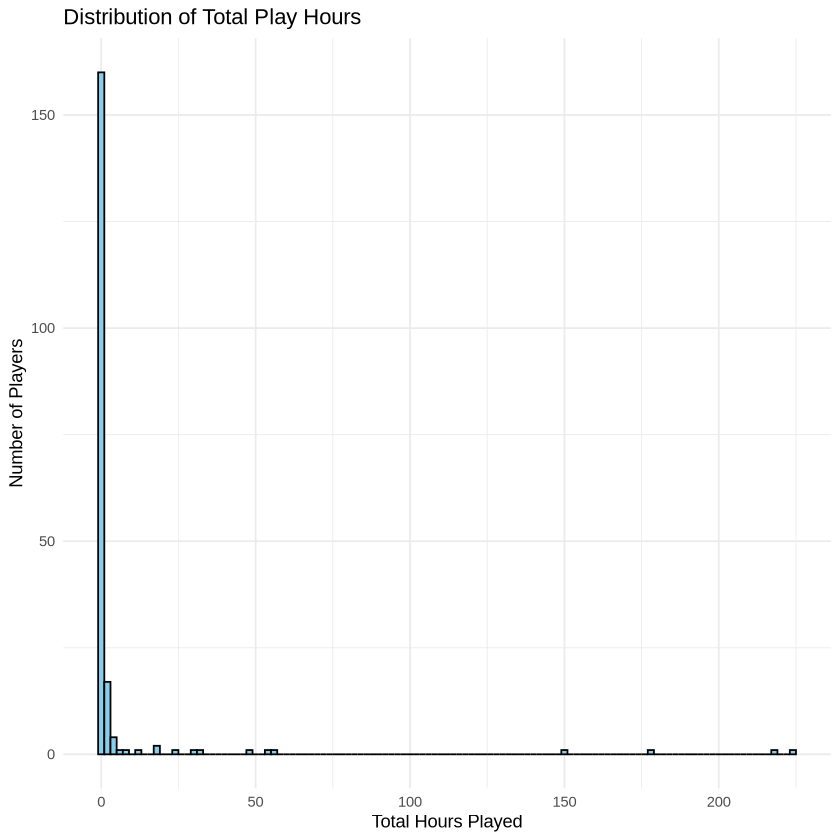

In [5]:
players |>
ggplot(aes(x = played_hours)) +
geom_histogram(binwidth = 2, fill = "skyblue", color = "black") +
labs( title = "Distribution of Total Play Hours",
      x = "Total Hours Played",
      y = "Number of Players") +
  theme_minimal()

I created a histogram to explore how much time players spent in total on the server. The histogram shows the distribution of total play hours among all players.
Most players spent less than 10 hours playing on the server, and only a few players spent more than 50 hours.
The distribution is highly right-skewed, which means that while the majority of players are casual users, there are a few players who spend a much larger amount of time in the game.
These long-hour players might represent highly engaged or “hardcore” users.


# 4. Identifying Outliers with Boxplot

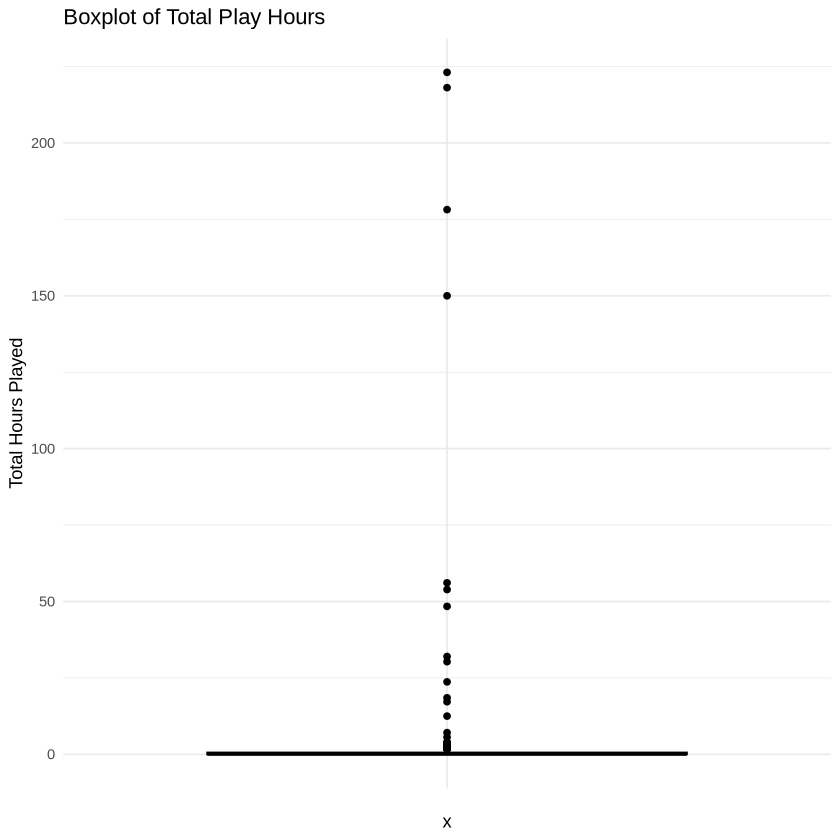

In [6]:
players |>
ggplot(aes(x = "", y = played_hours)) +   
geom_boxplot(fill = "lightgreen", color = "black") +
labs(title = "Boxplot of Total Play Hours",
    y = "Total Hours Played") +
  theme_minimal()

I made a boxplot to check if there are any extreme values in the total play hours. The box is very close to the bottom, which shows that most players spent only a few hours playing on the server. However, there are several points far above the box—these are clear outliers that represent players who played for a much longer time than everyone else.

This pattern matches the histogram I made earlier, where most players had short playtime and only a few were very active. The short box and long whiskers mean that playtime is highly uneven across players. These outliers might strongly affect the mean, so using the median could give a more accurate idea of what a “typical” player looks like.

In the next stage of the project, I will keep these extreme values in mind, since they could influence the prediction model later. For example, players with unusually long playtime might behave differently when deciding whether to subscribe to the newsletter.